# TSF Task 3 - To Explore Unsupervised Machine learning
**Problem statement: From The given 'iris' dataset,we have to predict optimum number of clusters and represent it visually. Here, we will use k-means clustering algorithm. Also we will find appropriate numbers of clusters for Kmeans ny using Elbow method and Silhouette method.**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#importing the 'iris' dataset
data=pd.read_csv(r'C:\Users\hp\Desktop\iris.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [22]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#statistical description of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**As there are no nan(not a number) values present in our data, we can proceed forward and check how many classes of species is present in our dataset**

In [10]:
#No. of unique classes present in target column "Species":
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Visualization and indentification of outliers in the dataset, using Boxplot technique**

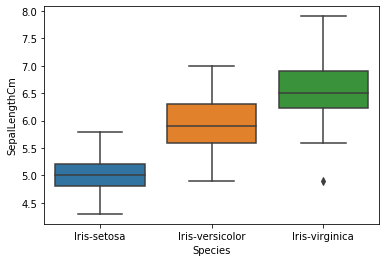

In [27]:
ax=sns.boxplot(x='Species',y='SepalLengthCm',data=data)

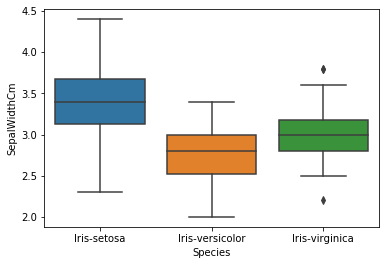

In [28]:
ax=sns.boxplot(x='Species',y='SepalWidthCm',data=data)

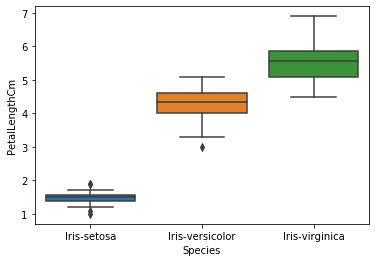

In [29]:
ax=sns.boxplot(x='Species',y='PetalLengthCm',data=data)

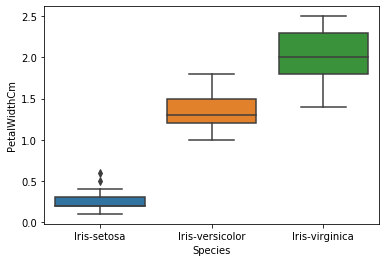

In [30]:
ax=sns.boxplot(x='Species',y='PetalWidthCm',data=data)

**Now we will separate the number of columns that we will use in K-means algorithm**

In [31]:
data1=data.iloc[:,:5].values

In [34]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data1)
scaled_features

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

# To find the value of optimal 'K' using the Elbow visualizer method
**To Perform elbow method, we run several K means by incrementing value of K with each iteration and record Sum of squared errors value for each iteration**

In [35]:
from sklearn.cluster import KMeans
k_kwargs = {'init':'random',
           'n_init':10,
           'max_iter':300,
           'random_state':None}

#Initializing an empty list which will hold the SSE values for each iteration.
sse =[]

# Now we will iterate through 1-10 n_clusters and apply K-means on each.
for k in range(1,11):
    km_elbow = KMeans(n_clusters=k, **k_kwargs)
    # Fitting the scaled features into kmeans.
    km_elbow.fit(scaled_features)
    # Appending the lowest sse value to sse list.
    sse.append(km_elbow.inertia_)

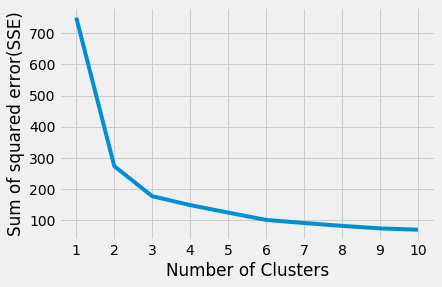

In [37]:
# Plotting the SSE curve
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error(SSE)')
plt.grid(True)
plt.show()

# Silhouette Coefficients Method
**Silhouette coefficient values ranges between -1 and 1. Larger numbers indicates that samples are closer to their clusters than they are to other clusters.
To find silhouette coefficients loop through values of k again but this time instead of computing SSE, we will compute silhouette coefficient**

In [39]:
from sklearn.metrics import silhouette_score
k_kwargs = {'init':'random','n_init':10,'max_iter':300,'random_state':None}

# Initialize the list which is going to hold values of silhouette coefficients for each K.
silhouette_coeff = []

# Start with 2 clusters otherwise silhouette score will give an error.
for k in range(2,11):
    # Instantiating K-means class for each n_cluster value.
    km_silhouette = KMeans(n_clusters = k, **k_kwargs)
     # Fitting the scaled features into kmeans.
    km_silhouette.fit(scaled_features)
    # Estimating the silhouette score
    score = silhouette_score(scaled_features, km_silhouette.labels_)
    # Appending the silhouette score in silhouette coefficients list 
    silhouette_coeff.append(score)
print(silhouette_coeff)

[0.570815210603504, 0.452949780355554, 0.39116461465692204, 0.32750726111416584, 0.348764727279694, 0.32663803898412436, 0.323979641506664, 0.2959557158155894, 0.29490451625566283]


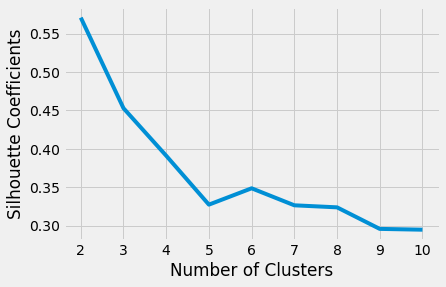

In [40]:
#Plotting the silhouette coefficients.
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.grid(True)

In [43]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(init= "random",n_clusters = 3,n_init = 10,max_iter = 300,random_state=None)

kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

# Statistics from initialize run with lowest SSE value

In [44]:
#The lowest SSE value
print('The lowest SSE value is :',kmeans.inertia_)
#Final locations of the centroid
print('Final locations of centroid are:',kmeans.cluster_centers_)
#The number of iterations required to converge
print('The number of iterations required to converge',kmeans.n_iter_)
# Cluster Assignments
print('The cluster assignments are:',kmeans.labels_)

The lowest SSE value is : 177.05608895062974
Final locations of centroid are: [[ 0.07560189  0.03894137 -0.73184462  0.30676007  0.21508647]
 [-1.1547262  -1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.14317894  1.03542672 -0.07079946  1.04224753  1.09269889]]
The number of iterations required to converge 11
The cluster assignments are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Visual Representation of the clusters
Now we are going to plot the clusters we have received from K-means algorithm.

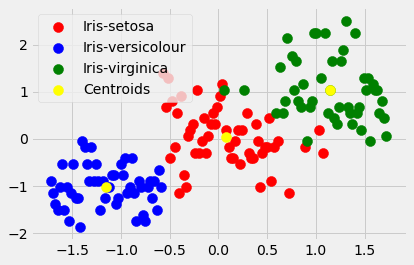

In [46]:
# Visualising the clusters - On the first two columns
kmeans_fit_predict = kmeans.fit_predict(scaled_features)
plt.scatter(scaled_features[kmeans_fit_predict == 0, 0], scaled_features[kmeans_fit_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_features[kmeans_fit_predict == 1, 0], scaled_features[kmeans_fit_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_features[kmeans_fit_predict == 2, 0], scaled_features[kmeans_fit_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Yellow', label = 'Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the model
Here we are going to use the "adjusted rand index" to evaluate our model. The value of adjusted rand index lies between (-1,1). A value closer to 0 indicates random assignments and value closer to 1 indicates perfectly labeled clusters.

In [47]:
#Evaluating the model
#Here we are going to use the "adjusted rand index" to evaluate our model. The value of adjusted rand index lies between -1 and 1. A value closer to 0 indicates random assignments and value closer to 1 indicates perfectly labeled clusters.

from sklearn.metrics import adjusted_rand_score
# Taking the species column as true clusters in adjusted rand score.
data2 = data.iloc[:,-1].values
ari = adjusted_rand_score(data2 ,kmeans.labels_)
print('The adjusted rand index of our Kmeans model is: ',ari)

The adjusted rand index of our Kmeans model is:  0.8681109348039796
